In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Section: errata from in September

## Measuring the fI curve
Much better now:
![Testing the model equilibria](../Figures/ThetaNeuronResponseToCurrentPeriod.png)


## Perturbations: recap
Try a perturbation of the Duffing equation:

\begin{align*}
\ddot{x}+x+\epsilon x^{3}=0, \quad 0<\varepsilon \ll 1 \hspace{10mm} x(0) = a, \dot{x}(0) = 0
\end{align*}

Say that $x(t)=x_{0}(t)+\varepsilon x_{1}(t)+\varepsilon^{2} x_{2}(t) + \mathcal{O}(\varepsilon^3)$:
\begin{align*}
0 &= \ddot{x_0} + \varepsilon\ddot{x_1} + \varepsilon^2 \ddot{x_2} + x_0 + \varepsilon x_{1} + \varepsilon^{2} x_2 + \epsilon (x_{0} + \varepsilon x_{1})^{3} + \mathcal{O}(\varepsilon^3)\\
&= \ddot{x_0} + \varepsilon\ddot{x_1} + \varepsilon^2 \ddot{x_2} + x_0 + \varepsilon x_{1} + \varepsilon^2 x_2 + \varepsilon (x_0^3 + \varepsilon 3 x_0^3 x_1^3 ) + \mathcal{O}(\varepsilon^3) \\
&= \ddot{x_0} + x_0 + \varepsilon \cdot \left(\ddot{x_1} + x_{1} + x_0^3\right) + \varepsilon^2 \cdot \left(\ddot{x_2} + x_2 + 3 x_0^3 x_1^3 \right) + \mathcal{O}(\varepsilon^3)
\end{align*}

This yields for the $\mathcal{O}(1)$:
\begin{align*}
0 &= \ddot{x_0} + x_0  \hspace{10mm} x_o = e^{ax} \\
&= a^2 e^{ax} + e^{ax} = e^{ax} \cdot \left(a^2 + 1\right) \rightarrow a = \pm i
\end{align*}

For $a_1 \neq a_2$ with $a_1 = \alpha + i \beta$ and $a_2 = \alpha - i \beta$ the solution is:
\begin{align*}
x_0(t) &= e^{\alpha x} \left( c_1 \cos \left( \beta t \right) + c_2 \sin \left( \beta t \right) \right) =  c_1 \cos t + c_2 \sin t \\
x_0(0) &= a = c_1 \\
x_0(t) &= a \cos t
\end{align*}


For the $\mathcal{O}(\varepsilon)$:
\begin{align*}
\ddot{x_1} + x_1 &= -x_0^3 = -a^3 \cos^3 t = -\frac{a^{3}}{4}(3 \cos t+\cos 3 t)
\end{align*}

The homogeneous solution is again $x_1(t) = a \cos t$, and we can split the particular solution in two parts. Suggest $x_{1,p_1} = A \cos t + B \sin t$:
\begin{align*}
\frac{d}{dt}\left( -A \sin t + B \cos t \right) + A \cos t + B \sin t &= -A \cos t - B \sin t + A \cos t + B \sin t = -\frac{3a^{3}}{4} \cos t 
\end{align*}

That does not work. Try $x_{1,p_1} = A t \cos t + B t \sin t$:
\begin{align*}
\frac{d}{dt}\left( A \cos t - A t \sin t + B \sin t + B t \cos t \right) + A t \cos t + B t \sin t &= -A \sin t - A \sin t - A t \cos t + B \cos t + B \cos t - B t \sin t = -\frac{3a^{3}}{4} \cos t \\
&
\begin{cases}
\mathcal{O}(\sin t): -A - A = 0 \\
\mathcal{O}(t \cos t): A = 0 \\
\mathcal{O}(\cos t): 2B = -\frac{3a^{3}}{4} \leftrightarrow B = -\frac{3a^{3}}{8}\\
\end{cases}
\end{align*}

Then the other particular solution: try $x_{1,p_2} = A \cos (3 t) + B \sin (3 t)$:
\begin{align*}
\frac{d}{dt}\left( - 3 A \sin t + 3 B \cos t \right) + A \cos (3 t) + B \sin (3 t) &= -9A \cos (3 t) -9 B \sin t(3 t) + A \cos (3 t) + B \sin (3 t) = -\frac{a^{3}}{4} \cos (3 t) \\
&
\begin{cases}
\mathcal{O}(\cos t): -9A + A = -8 A = -\frac{a^{3}}{4} \leftrightarrow A = \frac{a^{3}}{32}\\
\mathcal{O}(\sin t): B = 0
\end{cases}
\end{align*}

So now:
\begin{align*}
x(t) = a \cos t + \varepsilon \cdot \left( -\frac{3a^{3}}{8}t \sin t + \frac{a^{3}}{32} \cos (3 t) \right) + \varepsilon^{2} x_{2}(t) + \mathcal{O}(\varepsilon^3)
\end{align*}

And so on for the terms in $\varepsilon^2$.

## Solutions for I(t) on a slow timeframe

For the QIF neuron we were in trouble when using $\iota = V$ as that would change the model. Inseperable ode's like

\begin{align*}
\frac{dV}{dt} &= V^2 + \iota(t) \\
\end{align*}

cannot be solved exactly due to the power on $V^2$. However, we can perform pertubations!

### Perturbation on $\iota(t) = \iota_0 + \varepsilon t$
\begin{align*}
\frac{dV}{dt} &= V^2 + \iota_0 + \varepsilon t \hspace{10mm} V(t=0) = –\infty \\
\end{align*}

Take $V(t, \varepsilon) = V_0(t) + \varepsilon V_1(t) + \varepsilon^2 V_2(t) + \mathcal{O}(\varepsilon^3)$:

\begin{align*}
\frac{dV}{dt} &= V^2 + \iota_0 + \varepsilon t\\
\dot{V_0(t)} + \varepsilon \dot{V_1(t)} + \varepsilon^2 \dot{V_2(t)} &= \left( V_0(t) \right)^2 + \left( \varepsilon V_1(t) \right)^2  + 2 \varepsilon V_0(t) V_1(t) + 2 \varepsilon^2 V_0(t) V_2(t) + \mathcal{O}(\varepsilon^3) + \iota_0 + \varepsilon t \\
0 &= \left( -\dot{V_0(t)} + \left( V_0(t) \right)^2 + \iota_0 \right) + \varepsilon \cdot \left( -\dot{V_1(t)} +  2 V_0(t) V_1(t) + t \right) + \varepsilon^2 \cdot \left( -\dot{V_2(t)} + \left( V_2(t) \right)^2 + 2 V_0(t) V_2(t) \right)
\end{align*}

For $\mathcal{O}(1)$:

\begin{align*}
\dot{V_0(t)} &= \left( V_0(t) \right)^2 + \iota_0 \\
\int_{V_0(0)}^{V_0(t)} \frac{dv}{v^2 + \iota_0} 
&= \int_{V_0(0)}^{V_0(t)} \frac{1}{\iota_0 \left(\left(\frac{v}{\sqrt{\iota_0}}\right)^2 + 1 \right)} dv
\underset{x = \frac{v}{\sqrt{\iota_0}} \: \:dx = \frac{dv}{\sqrt{\iota_0}}}{=} 
\frac{1}{\sqrt{\iota_0}}\int_{\frac{V_0(0)}{\sqrt{\iota_0}}}^{\frac{V_0(t)}{\sqrt{\iota_0}}} \frac{1}{x^2 + 1} dx \\
&= \frac{1}{\sqrt{\iota_0}} \arctan(x) \rvert_{\frac{V_0(0)}{\sqrt{\iota_0}}}^{\frac{V_0(t)}{\sqrt{\iota_0}}} 
= \frac{1}{\sqrt{\iota_0}} \left( \arctan \left( \frac{V_0(t)}{\sqrt{\iota_0}} \right) - \arctan \left( \frac{V_0(0)}{\sqrt{\iota_0}} \right) \right) = \int_0^t d\tau = t
\end{align*}

So 

\begin{align*}
t &= \frac{1}{\sqrt{\iota_0}} \left( \arctan \left( \frac{V_0(t)}{\sqrt{\iota_0}} \right) - \arctan \left( \frac{V_0(0)}{\sqrt{\iota_0}} \right) \right) \\
V_0(t) &= \sqrt{\iota_0} \tan \left( t\sqrt{\iota_0} + \arctan \left( \frac{V_0(0)}{\sqrt{\iota_0}} \right) \right) \longrightarrow V_0(0) = -\infty \\
V_0(t) &= \lim_{V_0(0) \rightarrow -\infty} \sqrt{\iota_0} \tan \left( t\sqrt{\iota_0} + \arctan \left( \frac{V_0(0)}{\sqrt{\iota_0}} \right) \right) = \sqrt{\iota_0} \tan \left( t\sqrt{\iota_0} - \frac{\pi}{2} \right)\\
\end{align*}

Then

\begin{align*}
V_0(t) = - \sqrt{\iota_0} \cot \left( t\sqrt{\iota_0} \right)
\end{align*}


Now for $\mathcal{O}(\varepsilon)$:

\begin{align*}
\frac{d}{d\varepsilon}&: \dot{V_1(t)} + 2 \varepsilon \dot{V_2(t)} = 2 V_0(t) V_1(t) + 2 \varepsilon V_1(t)^2 + t\\
\frac{d}{d\varepsilon}\rvert_{\varepsilon = 0}&: \dot{V_1(t)} = 2 V_0(t) V_1(t) + t \\
\end{align*}

Change variables: $\frac{dx}{dt} - 2 V_0(t) x = \frac{dx}{dt} + p(t) x = t$. Recognise that this is an inseperable differential equation! Take 

\begin{align*}
\mu &= \exp \left\{ \int p(t)dt \right\} \\
\int p(t)dt &= - 2\int V_0(t)dt = 2\sqrt{\iota_0} \int \cot \left( t\sqrt{\iota_0} \right) dt
\underset{x = t \sqrt{\iota_0} \: \:dx = \sqrt{\iota_0} dt}{=} 
2\int \cot (x) dx \\
&= 2\int \frac{\cos(x)}{\sin(x)} dx
\underset{u = \sin(x) \: \:du = \cos(x) dx}{=} 
2\int \frac{1}{v} dx = 2 \cdot \ln \lvert v \rvert = 2 \cdot \ln \lvert \sin \left(t \sqrt{\iota_0} \right) \rvert \\
\mu &= \exp \left\{ 2 \cdot \ln \lvert \sin \left(t \sqrt{\iota_0} \right) \rvert \right\} = \lvert \sin \left(t \sqrt{\iota_0} \right) \rvert^2 = \left( \sqrt{\sin^2 \left(t \sqrt{\iota_0} \right) } \right)^2 = \sin^2 \left(t \sqrt{\iota_0} \right)
\end{align*}

Now we can say that $\frac{d\mu}{dt} = \mu p(t)$ and that $x = \frac{1}{\mu} \int \mu p(t) dt$ (see theory on inseperable equations [here](https://en.wikipedia.org/wiki/Inseparable_differential_equation)):

\begin{align*}
\int \mu p(t) dt &= 2\sqrt{\iota_0} \int \sin^2 \left(t \sqrt{\iota_0} \right) \cdot \frac{ \cos \left( t\sqrt{\iota_0} \right)}{\sin \left( t\sqrt{\iota_0} \right)}dt \\
&= 2\sqrt{\iota_0} \int \sin \left(t \sqrt{\iota_0} \right) \cdot \cos \left( t\sqrt{\iota_0} \right) dt
\underset{x = t \sqrt{\iota_0} \: \:dx = \sqrt{\iota_0} dt}{=} 
2 \int \sin (x) \cdot \cos (x) dx
\underset{u = \sin(x) \: \:du = \cos(x) dx}{=} 
2 \int u du = 2 \frac{u}{2} = \sin^2 \left(t \sqrt{\iota_0} \right) + c_1
\end{align*}

That leaves us with:

\begin{align*}
x = V_1(t) &= \frac{\sin^2 \left(t \sqrt{\iota_0} \right) + c_1}{\sin^2 \left(t \sqrt{\iota_0} \right)}
= 1 + \frac{c_1}{\sin^2 \left(t \sqrt{\iota_0} \right)} \\
c_1 &= \left( V_1(t) - 1 \right) \cdot \sin^2 \left(t \sqrt{\iota_0} \right)
\end{align*}

Evaluate at $t = 0$ so that $V_1(0) = -\infty$?

\begin{align*}
c_1 &= \lim_{t \rightarrow 0} \left( V_1(t) - 2 \right) \cdot \sin^2 \left(t \sqrt{\iota_0} \right)
= \left( -\infty - 2 \right) \cdot \sin^2 (0) 
=\left( -\infty - 2 \right) \cdot 0 = 0
\end{align*}

So $V_1(t) = 1$? Doesn't seem to make sense, but this does not seem to depend on $V_1(0)$, only on $t=0$.


Then let's continue with $\mathcal{O}(\varepsilon^2)$:
\begin{align*}
\dot{V_2(t)} &= V_2(t)^2 + 2 \cdot V_0(t) \cdot V_2(t) \\
\dot{V_2(t)} \cdot \frac{1}{V_2(t)} &= V_2(t) + 2 \cdot V_0(t)
\end{align*}

This is again an inseperable equation, but there does not seem to exist an expression to solve this differential equation.

# Section: the learning window as a polynomial
We will investigate how to reduce the complexity of the learning window function. The properties of the learning window $W(s)$ are:
* $W$ is defined on an interval $[-\tau, \tau]$
* 


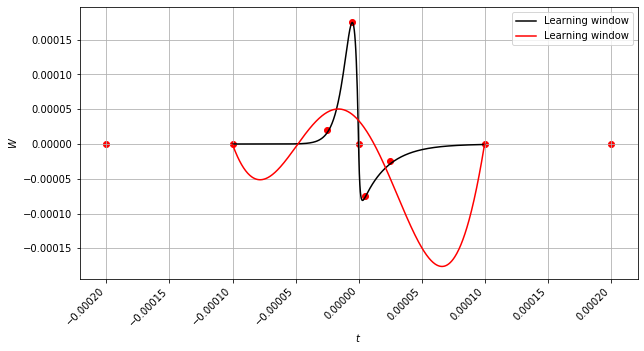

In [2]:
# Kempter 1999 learning window:
t_syn = 5.0e-6
t_pos = 1.0e-6
t_neg = 20.0e-6
A_p = 1
A_n = -1

def Window(t, t_syn, t_pos, t_neg, A_p, A_n):
    learning_rate = 10.0e-5
    eps = 1.0e-9
    
    W = np.zeros(t.shape)
    t_neg_idx = t <= 0
    t_pos_idx = t > 0
    W[t_neg_idx] = np.exp(t[t_neg_idx]/t_syn + eps)*(A_p*(1-t[t_neg_idx]/t_pos) + A_n*(1-t[t_neg_idx]/t_neg))
    W[t_pos_idx] = A_p*np.exp(-t[t_pos_idx]/t_pos + eps) + A_n*np.exp(-t[t_pos_idx]/t_neg + eps)
    return learning_rate * W


# Approximation by a polynomial:
t_pts = 1.0e-4 * np.array([-2, -1, -0.25, -0.05, 0, 0.05, 0.25, 1, 2])
W_vls = 1.0e-4 * np.array([0, 0, 0.2, 1.75, 0, -0.75, -0.25, 0, 0])

def Polynomial(t, t_pts, W_vls):
    pol = np.polyfit(t_pts, W_vls, t_pts.size-3)
    return np.polyval(pol,t) 
    
t = np.linspace(-1.0e-4, 1.0e-4, 500)
W_k = Window(t, t_syn, t_pos, t_neg, A_p, A_n)
W_a = Polynomial(t, t_pts, W_vls)

plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(t,W_k,'k',label="Learning window")
plt.plot(t,W_a,'r',label="Learning window")
plt.scatter(t_pts,W_vls,c='r')

plt.xticks(rotation=45, ha="right")
plt.xlabel(r"$t$")
plt.ylabel(r"$W$")

plt.legend();


In [4]:
# Compute the area with a trapezoidal rule:
from np import trapz
integral = trapz(t,W_k)
print(integral)

-5.558565196844804e-10


Jacobi Method Output:
Number of Iterations:  40
Norm of Difference:  0.0


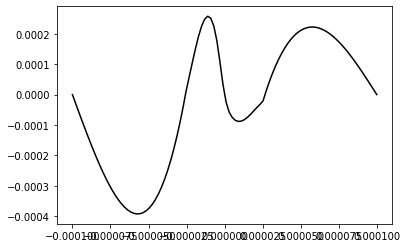

In [5]:
import pandas as pd
import numpy as np

def jacobi(A, b, x0, tol, n_iterations=300):
    """
    Performs Jacobi iterations to solve the line system of
    equations, Ax=b, starting from an initial guess, ``x0``.
    
    Returns:
    x, the estimated solution
    """
    
    n = A.shape[0]
    x = x0.copy()
    x_prev = x0.copy()
    counter = 0
    x_diff = tol+1
    
    while (x_diff > tol) and (counter < n_iterations): #iteration level
        for i in range(0, n): #element wise level for x
            s = 0
            for j in range(0,n): #summation for i !=j
                if i != j:
                    s += A[i,j] * x_prev[j] 
            
            x[i] = (b[i] - s) / A[i,i]
        #update values
        counter += 1
        x_diff = (np.sum((x-x_prev)**2))**0.5 
        x_prev = x.copy() #use new x for next iteration
        
    
    print("Number of Iterations: ", counter)
    print("Norm of Difference: ", x_diff)
    return x

def cubicSpline(x, y, tol = 1e-100):
    """
    Interpolate using natural cubic splines.
    
    Generates a strictly diagonal dominant matrix then applies Jacobi's method.
    
    Returns coefficients:
    b, coefficient of x of degree 1
    c, coefficient of x of degree 2
    d, coefficient of x of degree 3
    """ 
    x = np.array(x)
    y = np.array(y)
    ### check if sorted
    if np.any(np.diff(x) < 0):
        idx = np.argsort(x)
        x = x[idx]
        y = y[idx]

    size = len(x)
    delta_x = np.diff(x)
    delta_y = np.diff(y)
    
    ### Get matrix A
    A = np.zeros(shape = (size,size))
    b = np.zeros(shape=(size,1))
    A[0,0] = 1
    A[-1,-1] = 1
    
    for i in range(1,size-1):
        A[i, i-1] = delta_x[i-1]
        A[i, i+1] = delta_x[i]
        A[i,i] = (3/2*delta_x[i-1]+2*delta_x[i]) if i == 1 else 2*(delta_x[i-1]+delta_x[i])
    ### Get matrix b
        b[i,0] = 3*(delta_y[i]/delta_x[i] - delta_y[i-1]/delta_x[i-1])     
    A[-2, -2] = (3/2*A[-2, -3]+2*A[-3, -2])
    
    ### Solves for c in Ac = b
    print('Jacobi Method Output:')
    c = jacobi(A, b, np.zeros(len(A)), tol = tol, n_iterations=1000)
    
    ### Solves for d and b
    d = np.zeros(shape = (size-1,1))
    b = np.zeros(shape = (size-1,1))
    for i in range(0,len(d)):
        d[i] = (c[i+1] - c[i]) / (3*delta_x[i])
        b[i] = (delta_y[i]/delta_x[i]) - (delta_x[i]/3)*(2*c[i] + c[i+1])    
    
    return b.squeeze(), c.squeeze(), d.squeeze()


# Approximation by a polynomial:
t_pts = 1.0e-4 * np.array([-1, -0.25, -0.05, 0, 0.05, 0.25, 1])
W_vls = 1.0e-4 * np.array([0, 0.2, 1.75, 0, -0.75, -0.25, 0])
bs, cs, ds = cubicSpline(t_pts, W_vls)

t = np.linspace(-1.0e-4, 1.0e-4, 100)
W_a = np.zeros(t.shape)

tstart, Wstart = t_pts[0], W_vls[0]
for i, (b, c, d) in enumerate(zip(bs, cs, ds)):
    tend = t_pts[i+1]
    idx = (tstart <= t) & (t < tend)
    trange = t[idx]
    tdiff = trange - tstart
    W_a[idx] = Wstart + b * tdiff + c * tdiff**2 + d * tdiff**3
    
    tstart = tend
    Wstart = W_vls[i+1]

plt.plot(t,W_a,'k',label="Learning window")

# Section: making the adjacency matrices for full-scale simulations
Problem: most descriptions just use the degree distribution $P(k)$. We need to make $A_{ij}$ from $P(k)$. This is a *cover problem*.

We have the in- and out-degree vectors of the network defined in two ways:
\begin{align}
k^{in}_i, k^{out}_j \sim P(k) \longleftrightarrow  k^{in}_i = \sum_{j=1}^N A_{ij} \text{ and } k^{out}_j = \sum_{i=1}^N A_{ij}
\end{align}

Given constraints:
* $A_{ij}$ is directed, though $A_{ji} \neq A_{ji}$ necessarily.
* No selflinks are allowed: $A_{ii} = \bar{0}$
* The number of links is constant: $\sum_{i=1}^N k^{in}_i \equiv \sum_{j=1}^N k^{out}_j \equiv n(A_{ij})$. So we can say $k^{in}_i$ and $k^{out}_j$ are permutations of each other.


In [ ]:
# Method: pseudocode
nonzeros = sum(k_in);
xidx = zeros(nonzeros, 1);
yidx = zeros(nonzeros, 1);

choosefrom = 2:N;
prob_leftout = k_out(1);
probs = k_out(choosefrom);

start = 1;
for i in N:
    # Get link number and sample from k_out
    numlinks = k_in(i);
    chosen = datasample(choosefrom, numlinks, replace=false, weights=probs);
    
    xidx(start:(start+(num-1))) = i;
    yidx(start:(start+(num-1))) = chosen;
    
    [~, chosenidx] = ismember(chosen, choosefrom);
    uniqueidx = unique(chosenidx);
    probs(uniqueidx) = probs(uniqueidx) - 1;    
    
    if i != N:
        choosefrom(i) = i;
        
        tmp = probs(i);
        probs(i) = prob_leftout;
        prob_leftout = tmp;
    
    start = start + num; 

<img src="../Figures/A_fixeddegree.png" alt="Drawing" style="width: 500px;"/>
<img src="../Figures/A_random.png" alt="Drawing" style="width: 500px;"/>
<img src="../Figures/A_scalefree.png" alt="Drawing" style="width: 500px;"/>
